In [5]:
import json
import pandas as pd
import torch
data_xxl = pd.read_json('./data/data_1000.json')
data_xl = pd.read_json('./data/data_300_xl.json')
data_large = pd.read_json('./data/data_300_large.json')
data_base = pd.read_json('./data/data_300_base.json')
data_small = pd.read_json('./data/data_300_small.json')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [6]:
from sklearn.manifold import TSNE
import altair as alt 
import numpy as np

In [7]:
def plot_tsne(dataset):
    # anywhere you see font size, you can change it to whatever you want for the text
    chart = alt.Chart(dataset).mark_circle().encode(
        # I remove the x and y axis titles here, I also remove the ticks 
        x=alt.X('x1', scale=alt.Scale(domain=[-30, 30]), axis=alt.Axis(title=None, tickSize=0, labelPadding=10)), # modify the range of x axis
        y=alt.Y('x2', scale=alt.Scale(domain=[-30, 30]), axis=alt.Axis(title=None, tickSize=0, labelPadding=10)), # modify the range of y axis

        # modify the colour here. replace 'class:O' with whatever column name you have for the obs/unobs (e.g.) 'seen:N'
        color=alt.Color('class:O', scale=alt.Scale( 
            # insert hex codes for the colours here; I put in the green and blue I've used in other plots
            range=["#2CA02C","#1F77B4"], 
            )),
        # controls dot size
        size=alt.value(100)

    ).properties(title = '', width = 600, height = 600).configure_axisX( # modify here to make the plot bigger; change 600 --> whatever 
        grid=False, 
        domain=False, # toggle this to false to turn off the axis line, true to add it in  
    ).configure_axisY(
        grid=False,
        domain=False, # toggle this to false to turn off the axis line, true to add it in   
    ).configure_axis(
        labelFontSize=25,
        titleFontSize=25
    ).configure_legend(
        orient = 'right'
    ).configure_view(
        strokeWidth=0
    ).configure_legend( # configure legend properties
        titleFontSize=0,
        labelFontSize=25
    ) 

    return chart

def run_tsne(dataset):
    # Create a two dimensional t-SNE projection of the embeddings
    tsne = TSNE(2, verbose=1)
    tsne_proj = tsne.fit_transform(np.array(dataset['hidden_state'].tolist()))
    dtsne = pd.DataFrame(tsne_proj, columns=["x1", "x2"])

    dtsne['label'] = dataset['output_generated'].tolist()
    dtsne['answer'] = dataset['output_text'].tolist()
    dtsne['class'] = dataset['Instruction Type'].tolist()

    return dtsne

In [8]:
dtsne_xxl=run_tsne(data_xxl)
dtsne_xl=run_tsne(data_xl)
dtsne_large=run_tsne(data_large)
dtsne_base=run_tsne(data_base)
dtsne_small=run_tsne(data_small)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 12000 samples in 0.042s...
[t-SNE] Computed neighbors for 12000 samples in 36.913s...
[t-SNE] Computed conditional probabilities for sample 1000 / 12000
[t-SNE] Computed conditional probabilities for sample 2000 / 12000
[t-SNE] Computed conditional probabilities for sample 3000 / 12000
[t-SNE] Computed conditional probabilities for sample 4000 / 12000
[t-SNE] Computed conditional probabilities for sample 5000 / 12000
[t-SNE] Computed conditional probabilities for sample 6000 / 12000
[t-SNE] Computed conditional probabilities for sample 7000 / 12000
[t-SNE] Computed conditional probabilities for sample 8000 / 12000
[t-SNE] Computed conditional probabilities for sample 9000 / 12000
[t-SNE] Computed conditional probabilities for sample 10000 / 12000
[t-SNE] Computed conditional probabilities for sample 11000 / 12000
[t-SNE] Computed conditional probabilities for sample 12000 / 12000
[t-SNE] Mean sigma: 2.297872
[t-SNE] KL divergenc

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
dtsne_xxl["correct?"] = (dtsne_xxl["label"] == dtsne_xxl["answer"])
dtsne_xl["correct?"] = (dtsne_xl["label"] == dtsne_xl["answer"])
dtsne_large["correct?"] = (dtsne_large["label"] == dtsne_large["answer"])
dtsne_base["correct?"] = (dtsne_base["label"] == dtsne_base["answer"])
dtsne_small["correct?"] = (dtsne_small["label"] == dtsne_small["answer"])


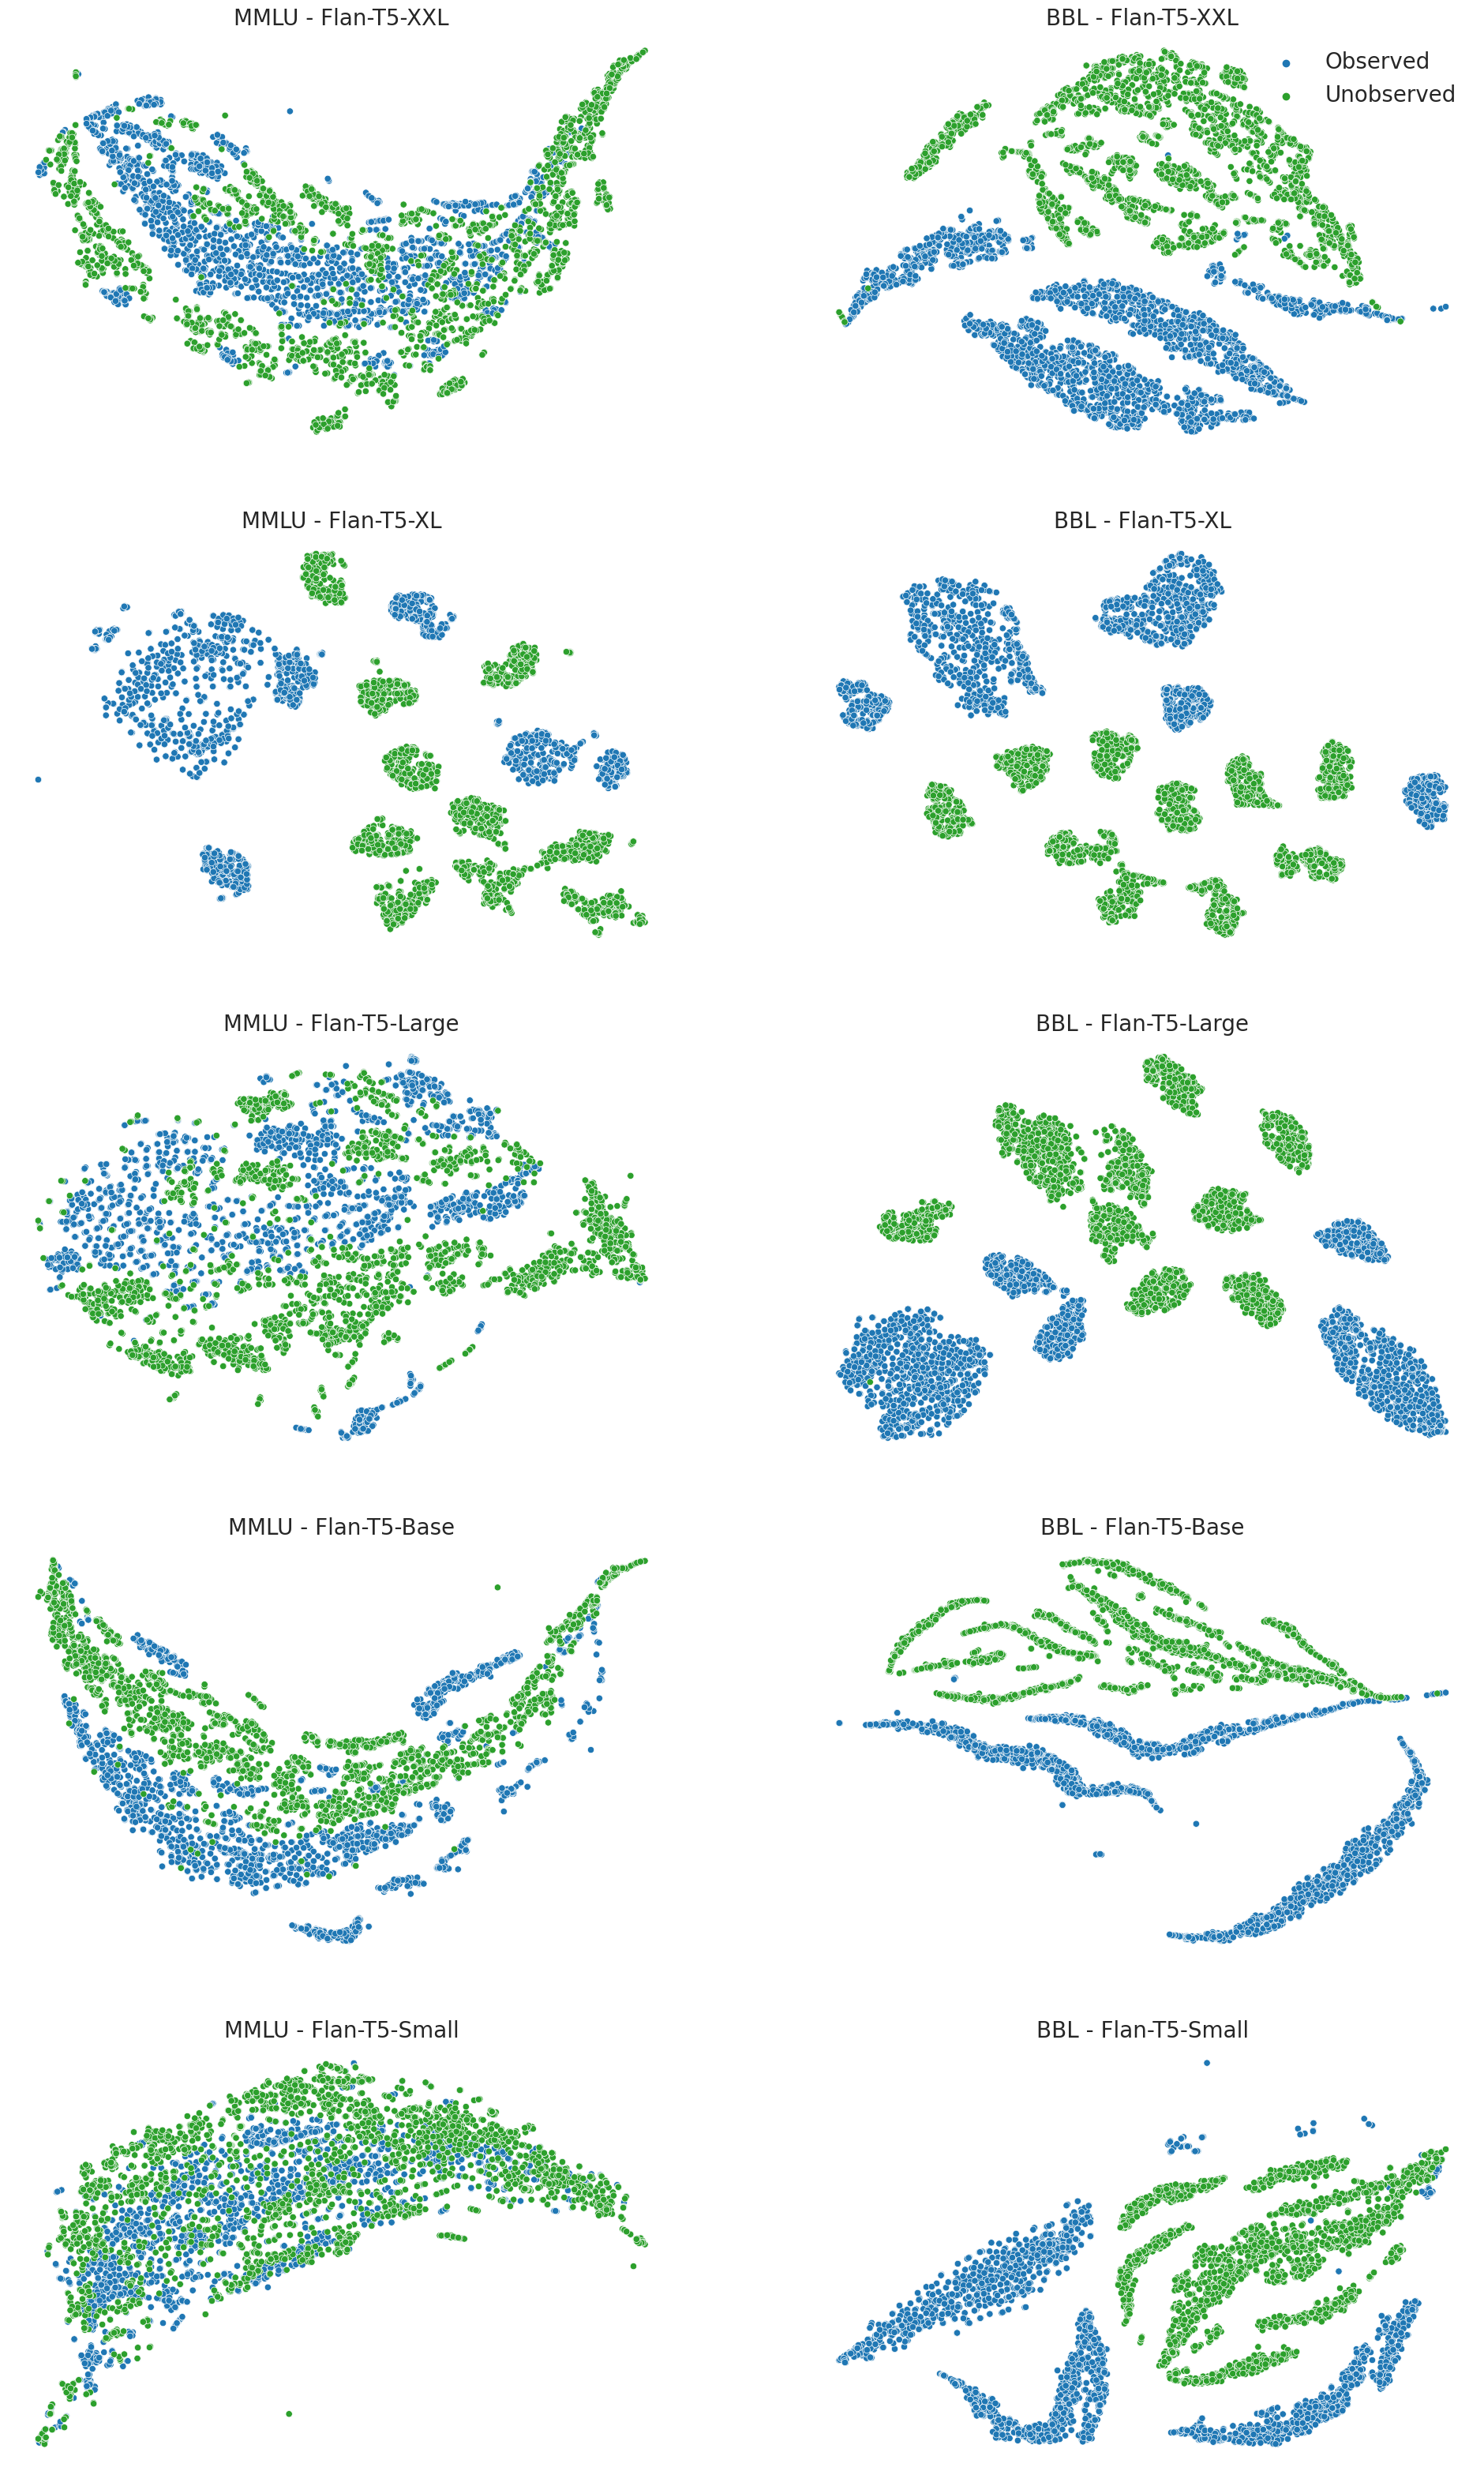

In [18]:
fig, axes = plt.subplots(5, 2, figsize=(24, 40))

mmlu_df_1 = dtsne_xxl[(dtsne_xxl['class'] == 'MMLU - Observed') | (dtsne_xxl['class'] == 'MMLU - Unobserved')]
bbl_df_1 = dtsne_xxl[(dtsne_xxl['class'] == 'BBL - Observed') | (dtsne_xxl['class'] == 'BBL - Unobserved')]
mmlu_df_2 = dtsne_xl[(dtsne_xl['class'] == 'MMLU - Observed') | (dtsne_xl['class'] == 'MMLU - Unobserved')]
bbl_df_2 = dtsne_xl[(dtsne_xl['class'] == 'BBL - Observed') | (dtsne_xl['class'] == 'BBL - Unobserved')]
mmlu_df_3 = dtsne_large[(dtsne_large['class'] == 'MMLU - Observed') | (dtsne_large['class'] == 'MMLU - Unobserved')]
bbl_df_3 = dtsne_large[(dtsne_large['class'] == 'BBL - Observed') | (dtsne_large['class'] == 'BBL - Unobserved')]
mmlu_df_4 = dtsne_base[(dtsne_base['class'] == 'MMLU - Observed') | (dtsne_base['class'] == 'MMLU - Unobserved')]
bbl_df_4 = dtsne_base[(dtsne_base['class'] == 'BBL - Observed') | (dtsne_base['class'] == 'BBL - Unobserved')]
mmlu_df_5 = dtsne_small[(dtsne_small['class'] == 'MMLU - Observed') | (dtsne_small['class'] == 'MMLU - Unobserved')]
bbl_df_5 = dtsne_small[(dtsne_small['class'] == 'BBL - Observed') | (dtsne_small['class'] == 'BBL - Unobserved')]
cols = ["#1F77B4", "#2CA02C"]
sns.scatterplot(ax=axes[0, 0], data=mmlu_df_1, x="x1", y="x2", hue="class", palette=cols)
sns.scatterplot(ax=axes[0, 1], data=bbl_df_1, x="x1", y="x2", hue="class", palette=cols)

sns.scatterplot(ax=axes[1, 0], data=mmlu_df_2, x="x1", y="x2", hue="class", palette=cols)
sns.scatterplot(ax=axes[1, 1], data=bbl_df_2, x="x1", y="x2", hue="class", palette=cols)

sns.scatterplot(ax=axes[2, 0], data=mmlu_df_3, x="x1", y="x2", hue="class", palette=cols)
sns.scatterplot(ax=axes[2, 1], data=bbl_df_3, x="x1", y="x2", hue="class", palette=cols)

sns.scatterplot(ax=axes[3, 0], data=mmlu_df_4, x="x1", y="x2", hue="class", palette=cols)
sns.scatterplot(ax=axes[3, 1], data=bbl_df_4, x="x1", y="x2", hue="class", palette=cols)

sns.scatterplot(ax=axes[4, 0], data=mmlu_df_5, x="x1", y="x2", hue="class", palette=cols)
sns.scatterplot(ax=axes[4, 1], data=bbl_df_5, x="x1", y="x2", hue="class", palette=cols)

sns.set(font_scale=1)
sns.set_style("white")

axes[0, 0].get_legend().remove()

axes[1, 0].get_legend().remove()
axes[1, 1].get_legend().remove()

axes[2, 0].get_legend().remove()
axes[2, 1].get_legend().remove()

axes[3, 0].get_legend().remove()
axes[3, 1].get_legend().remove()

axes[4, 0].get_legend().remove()
axes[4, 1].get_legend().remove()


axes[0, 0].set_title("MMLU - Flan-T5-XXL", fontsize=20)
axes[0, 1].set_title("BBL - Flan-T5-XXL", fontsize=20)

axes[1, 0].set_title("MMLU - Flan-T5-XL", fontsize=20)
axes[1, 1].set_title("BBL - Flan-T5-XL", fontsize=20)

axes[2, 0].set_title("MMLU - Flan-T5-Large", fontsize=20)
axes[2, 1].set_title("BBL - Flan-T5-Large", fontsize=20)

axes[3, 0].set_title("MMLU - Flan-T5-Base", fontsize=20)
axes[3, 1].set_title("BBL - Flan-T5-Base", fontsize=20)

axes[4, 0].set_title("MMLU - Flan-T5-Small", fontsize=20)
axes[4, 1].set_title("BBL - Flan-T5-Small", fontsize=20)

handles, labels = axes[0, 1].get_legend_handles_labels()
axes[0, 1].legend(handles=handles[0:], labels=["Observed", "Unobserved"], fontsize=20)
axes[0, 1].get_legend().get_frame().set_alpha(0)

for i in range(axes.shape[0]):
    for j in range(axes.shape[1]):
        axes[i, j].set_xlabel(None)
        axes[i, j].set_ylabel(None)
        axes[i, j].spines['top'].set_visible(False)
        axes[i, j].spines['right'].set_visible(False)
        axes[i, j].spines['bottom'].set_visible(False)
        axes[i, j].spines['left'].set_visible(False)
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])

In [19]:
from matplotlib.backends.backend_pdf import PdfPages

with PdfPages('exp_emb_plot_5_samples.pdf') as pdf:
    # As many times as you like, create a figure fig and save it:
    pdf.savefig(fig)